Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Hepatitis Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
hepatitis_dataset = pd.read_csv('hepatitis.csv')

In [ ]:
# printing the first 5 rows of the dataset
hepatitis_dataset.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [ ]:
# number of rows and Columns in this dataset
hepatitis_dataset.shape

(142, 20)

In [ ]:
hepatitis_dataset.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [ ]:
hepatitis_dataset.isna().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [ ]:
# getting the statistical measures of the data
hepatitis_dataset.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.816901,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,0.388116,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [ ]:
hepatitis_dataset['class'].value_counts()

2    116
1     26
Name: class, dtype: int64

1 --> Class 1 Hepatitis

2 --> Class 2 Hepatitis

In [ ]:
hepatitis_dataset.groupby('class').mean()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,,,,,,,,,,,,,,,,,,,
1,44.923077,1.00000,1.423077,1.923077,1.076923,1.269231,1.653846,1.884615,1.500000,1.653846,1.269231,1.538462,1.615385,2.516154,120.576923,87.923077,3.239615,50.576923,1.769231
2,39.896552,1.12931,1.534483,1.818966,1.422414,1.698276,1.827586,1.810345,1.603448,1.844828,1.758621,1.956897,1.939655,1.128966,102.301724,82.517241,3.962931,64.198276,1.370690


In [ ]:
# separating the data and labels
X = hepatitis_dataset.drop(columns = 'class', axis=1)
Y =hepatitis_dataset['class']

In [ ]:
print(X)

     age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0     30    2        1           2        2        2         2          1   
1     50    1        1           2        1        2         2          1   
2     78    1        2           2        1        2         2          2   
3     34    1        2           2        2        2         2          2   
4     34    1        2           2        2        2         2          2   
..   ...  ...      ...         ...      ...      ...       ...        ...   
137   46    1        2           2        1        1         1          2   
138   44    1        2           2        1        2         2          2   
139   61    1        1           2        1        1         2          1   
140   53    2        1           2        1        2         2          2   
141   43    1        2           2        1        2         2          2   

     liver_firm  spleen_palable  spiders  ascites  varices  bilirubin  \
0 

In [ ]:
print(Y)

0      2
1      2
2      2
3      2
4      2
      ..
137    1
138    2
139    2
140    2
141    1
Name: class, Length: 142, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(142, 19) (113, 19) (29, 19)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier

from sklearn.svm import SVC
classifier = SVC()


classifier.fit(X_train, Y_train)

SVC()

Model Evaluation

Accuracy Score

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate the SVM classifier
classifier = SVC()

# Train the SVM classifier
classifier.fit(X_train, Y_train)

# Make predictions on the training data
X_train_prediction = classifier.predict(X_train)

# Calculate accuracy score on the training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8141592920353983


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8275862068965517


Making a Predictive System

In [ ]:
input_data = (30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,61,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is class 1 hepatitic')
else:
  print('The person is class 2 hepatitic')

[2]
The person is class 2 hepatitic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'modelhepatitis.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('modelhepatitis.sav', 'rb'))

In [ ]:
input_data = (30,2,1,2,2,2,2,1,2,2,2,2,2,1,85,18,4,61,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is class 1 hepatitic')
else:
  print('The person is class 2 hepatitic')

[2]
The person is class 2 hepatitic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
for column in X.columns:
  print(column)

age
sex
steroid
antivirals
fatigue
malaise
anorexia
liver_big
liver_firm
spleen_palable
spiders
ascites
varices
bilirubin
alk_phosphate
sgot
albumin
protime
histology


 NAIVE BAYES APPLICATION


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("hepatitis.csv")

# Preprocessing: Handling missing values
data.fillna(method='ffill', inplace=True)

# Splitting features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_pred = naive_bayes.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.7931034482758621
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.67      0.40         3
           2       0.95      0.81      0.88        26

    accuracy                           0.79        29
   macro avg       0.62      0.74      0.64        29
weighted avg       0.89      0.79      0.83        29



<ipython-input-28-944aabccdc1d>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=['Naive Bayes'], y=[accuracy_nb], color='pink', alpha=1, ci=None)


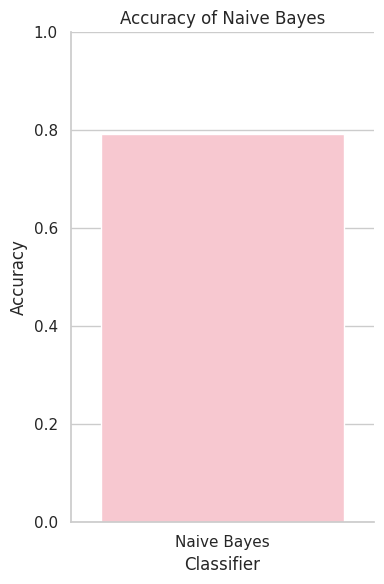

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy scores for Naive Bayes only
accuracy_nb = accuracy_score(y_test, nb_pred)

# Set seaborn style
sns.set(style="whitegrid")

# Plotting the bar graph with enhanced aesthetics and slim bar
plt.figure(figsize=(4, 6))
sns.barplot(x=['Naive Bayes'], y=[accuracy_nb], color='pink', alpha=1, ci=None)
plt.title('Accuracy of Naive Bayes')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
sns.despine()
plt.show()

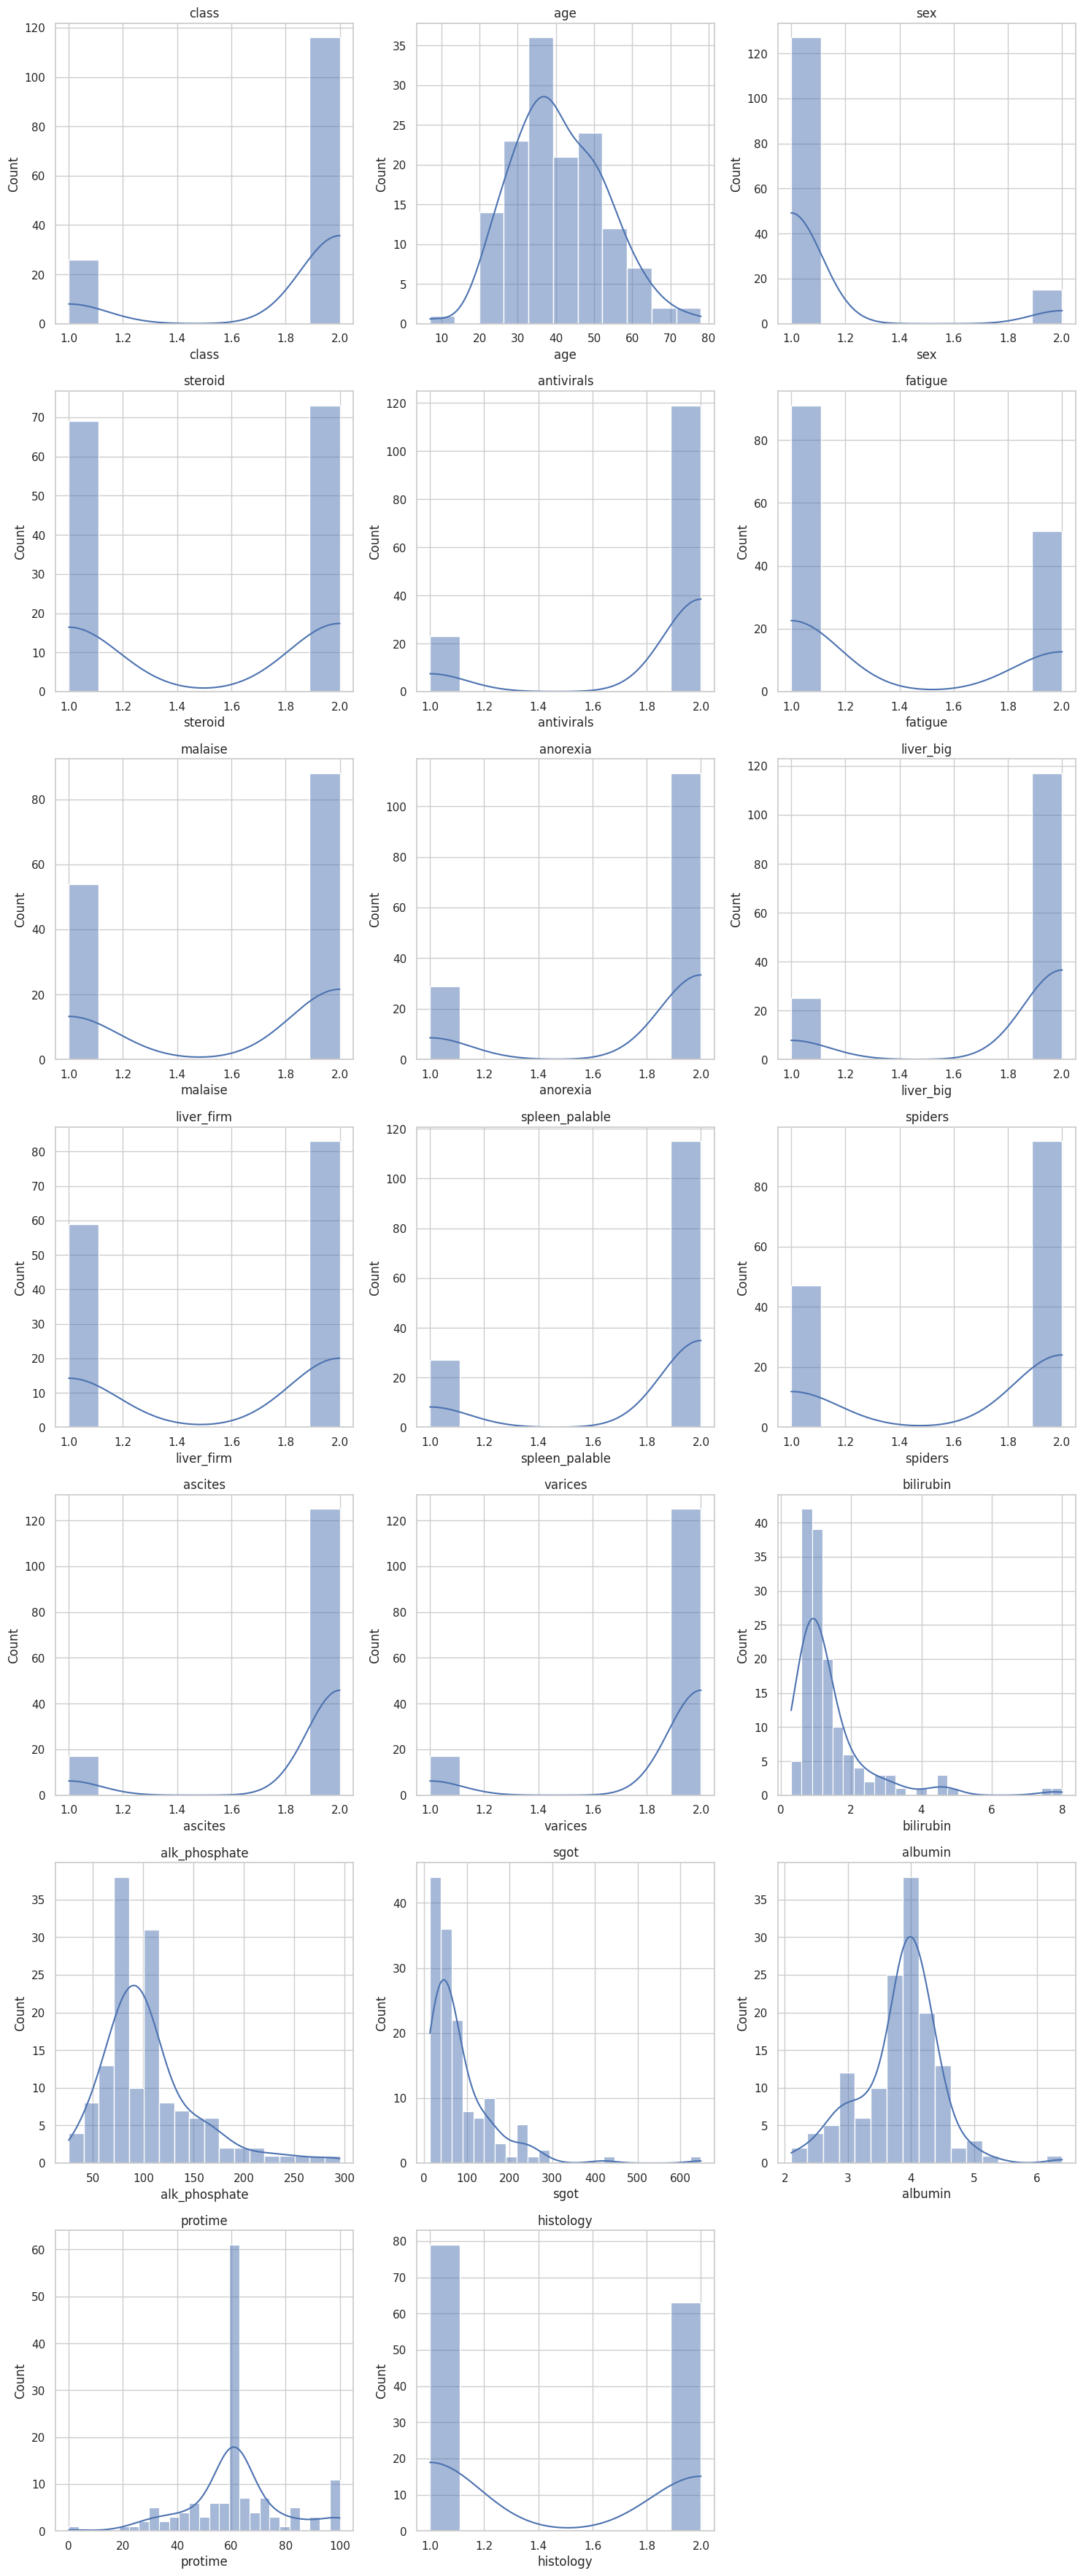

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming hepatitis_dataset is a DataFrame containing your dataset

# Plotting histograms for each feature
num_cols = len(hepatitis_dataset.columns)
num_rows = (num_cols // 3) + (num_cols % 3)  # Adjust the number of rows based on the number of columns

plt.figure(figsize=(15, 5 * num_rows))
sns.set(style="whitegrid")

for i, column in enumerate(hepatitis_dataset.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(hepatitis_dataset[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


Feature Selection

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
url = 'hepatitis.csv'
df = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = df.drop('class', axis=1)  # Assuming 'class' is the target variable
y = df['class']

# Select the top k features using ANOVA F-statistic
k = 10  # Set the number of features you want to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Display the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['fatigue', 'malaise', 'spleen_palable', 'spiders', 'ascites', 'varices',
       'bilirubin', 'albumin', 'protime', 'histology'],
      dtype='object')


Hyper Parameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Load the dataset
url = 'hepatitis.csv'
df = pd.read_csv(url)

# Separate features (X) and target variable (y)
X = df.drop('class', axis=1)  # Assuming 'class' is the target variable
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Define hyperparameters and their possible values for tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
    'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],  # Different prior probabilities
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_gnb = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_gnb.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = best_gnb.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'priors': [0.5, 0.5], 'var_smoothing': 0.0001}
Test Accuracy: 0.896551724137931


**var_smoothing** helps the model handle situations where a feature's variance is extremely low, and

**priors** lets you provide your own beliefs about the class distribution if you have prior information.